In [2]:
using Statistics
using Plots
using Measurements
using Distributions
using StatsBase
using DataFrames
using LsqFit


(process:7316): GLib-GIO-WARNING **: 16:33:27.099: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.5.13.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs


In [3]:
# PARAMETRI DELLA MISURAZIONE

# parametri della misurazione
h = 0.70
b1 = 0.40
lunghezza = 1.10
# 4 periodi

theta = atan(b1/h)

println("L'angolo è ", theta * 180 / π)

x = [8.33, 8.33, 8.63, 8.22, 8.43, 8.5, 8.28, 8.65, 8.46, 8.63, 8.37, 8.55, 8.38, 8.39, 8.39, 8.33, 8.4, 8.47, 8.38, 8.47, 8.34, 8.55, 8.41, 8.28, 8.69, 8.59, 8.08, 8.51, 8.41, 8.41, 8.52, 8.36, 8.28, 8.61, 8.46, 8.35, 8.4, 8.4, 8.26, 8.55, 8.48, 8.42, 8.45, 8.36, 8.42, 8.42, 8.51, 8.28, 8.35, 8.55, 8.36, 8.38, 8.38, 8.41, 8.44, 8.36, 8.64, 8.44, 8.46, 8.4, 8.42, 8.5, 8.53, 8.39, 8.69, 8.48, 8.6, 8.4, 8.35, 8.48, 8.39, 8.32, 8.52, 8.41, 8.41, 8.53, 8.38, 8.68, 8.36, 8.67, 8.33, 8.58, 8.64, 8.44, 8.36, 8.37, 8.3, 8.37, 8.36, 8.38, 8.5, 8.44, 8.6, 8.55, 8.35, 8.44, 8.38, 8.35, 8.5, 8.51, 8.44, 8.28, 8.46, 8.31, 8.36, 8.28, 8.57, 8.37, 8.44, 8.13, 8.38, 8.36, 8.62, 8.32, 8.42, 8.32, 8.36, 8.3, 8.44, 8.35, 8.7, 8.34, 8.55, 8.5, 8.4, 8.36, 8.44, 8.3, 8.4, 8.3, 8.39, 8.39, 8.46, 8.4, 8.44, 8.48, 8.6, 8.57, 8.48, 8.2, 8.36, 8.62, 8.34, 8.64, 8.2, 8.58, 8.6, 8.29, 8.38, 8.43, 8.52, 8.3, 8.31, 8.41, 8.44, 8.4, 8.62, 8.55, 8.54, 8.36, 8.42, 8.36, 8.48, 8.4, 8.53, 8.39, 8.56, 8.5, 8.4, 8.02, 8.41, 8.44, 8.45, 8.34, 8.15, 8.56, 8.52, 8.55, 8.52, 8.36, 8.55, 8.34, 8.23, 8.17, 8.35, 8.34, 8.18, 8.54, 8.3, 8.4, 8.42, 8.52, 8.27, 8.54, 8.59, 8.52, 8.2, 8.46, 8.39, 8.42]

L'angolo è 29.74488129694223


200-element Vector{Float64}:
 8.33
 8.33
 8.63
 8.22
 8.43
 8.5
 8.28
 8.65
 8.46
 8.63
 8.37
 8.55
 8.38
 ⋮
 8.3
 8.4
 8.42
 8.52
 8.27
 8.54
 8.59
 8.52
 8.2
 8.46
 8.39
 8.42

In [4]:
media = mean(x)
stddev = std(x)/sqrt(length(x))

misura = measurement(media, stddev)

incertezza_l = 0.005
stddev_l = incertezza_l / sqrt(24)

L = measurement(lunghezza, stddev_l)

println("Il tempo misurato è ", misura, " s")
println("La lunghezza misurata è ", L, " m")

Il tempo misurato è 8.425 ± 0.0084 s
La lunghezza misurata è 1.1 ± 0.001 m


In [5]:
mediana = median(x)
println("La media delle misure è ", media)
println("La mediana delle misure è ", mediana)
println("L'asimmetria delle misure è ", skewness(x))
println("L'eccesso di curtosi delle misure è ", kurtosis(x))

La media delle misure è 8.42505
La mediana delle misure è 8.41
L'asimmetria delle misure è -0.10959531754150027
L'eccesso di curtosi delle misure è 0.38774347751464733


In [6]:
G = fit_mle(Normal{Float64}, x)

Normal{Float64}(μ=8.425050000000002, σ=0.1186423090638412)

In [7]:
n_bins = minimum(x):0.035:maximum(x)#round(Int64, sqrt(length(x)))
area = length(x) * (maximum(x)-minimum(x))/length(n_bins)
println("Il numero di bin è ", length(n_bins))

Il numero di bin è 20


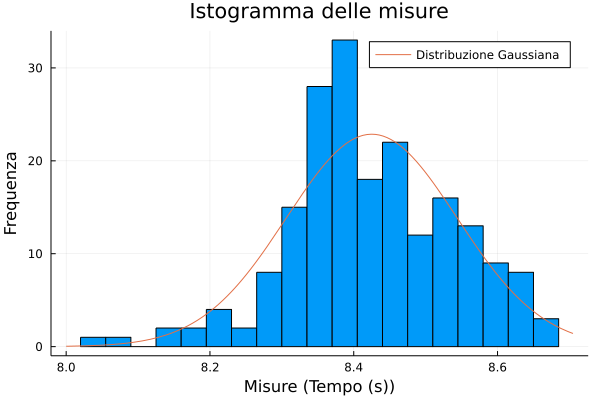

In [8]:
# istogramma delle misure
p1 = histogram(x, bins = n_bins, xlabel = "Misure (Tempo (s))", ylabel="Frequenza", label="", title="Istogramma delle misure")
plot!(t -> pdf(G, t) * area, label="Distribuzione Gaussiana")

In [9]:
# salvo il grafico
savefig("istogramma.png")

In [10]:
#funzione ausiliare per il punto seguente
function cumulative(x::Array{Float64}, mis::Float64)
    sum = 0
    for i in x
            if i < mis 
                sum += 1
            end
    end
    return sum
end 

cumulative (generic function with 1 method)

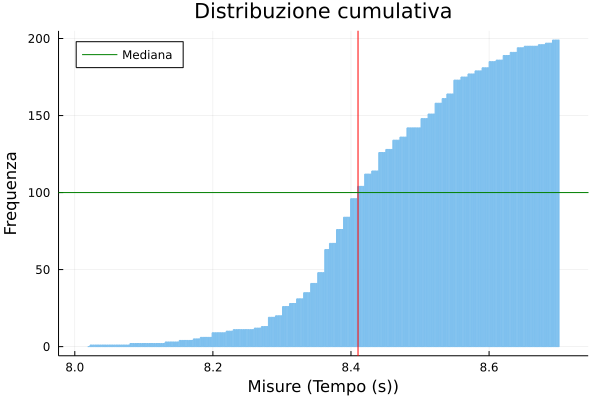

In [24]:
# istogramma cumulativo delle misure
minimo = minimum(x)
massimo = maximum(x)
n_bins = 200
intervallo = (massimo - minimo) / n_bins;
misure_ordinate = sort(x)
misure_cumulative = []

asse_x = minimo:intervallo:massimo
asse_y = cumulative.(Ref(x), asse_x)

p2 = bar(asse_x, asse_y, title = "Distribuzione cumulativa", label = "", xlabel = "Misure (Tempo (s))", ylabel="Frequenza", linecolor=:skyblue2, color=:skyblue2)
plot!([8.4+3*intervallo], linetype=:vline, label="", color="red")
plot!([100], linetype=:hline, label="Mediana", color="green", legend=:topleft)

In [12]:
# salvo il grafico
savefig("plot_cumulativo.png")

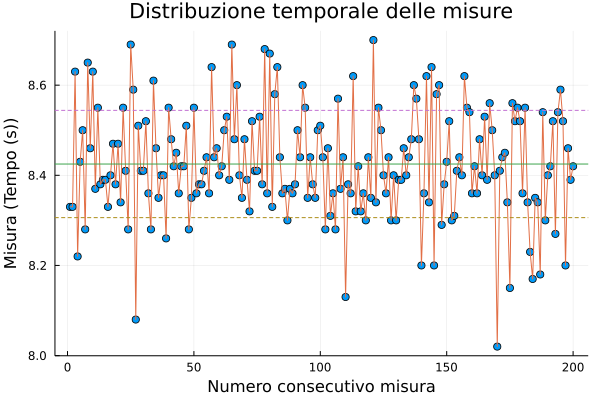

In [13]:
# distribuzione temporale delle misure
p3 = plot(x, seriestype=:scatter, label="", xlabel = "Numero consecutivo misura", ylabel="Misura (Tempo (s))", title="Distribuzione temporale delle misure")
plot!(x, label="")
plot!([media], linetype=:hline, label ="")
plot!([stddev*sqrt(length(x)) + media], linetype=:hline, label ="", ls = :dash)
plot!([-stddev*sqrt(length(x)) + media], linetype=:hline, label ="", ls = :dash)

In [14]:
# salvo il grafico
savefig("dist_temporale.png")

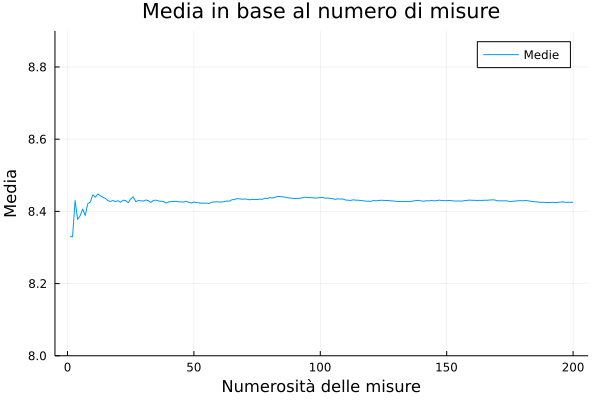

In [15]:
medie = []
deviazioni = []

for i in 1:length(x)
    m = mean(x[1:i])
    s = std(x[1:i])/sqrt(i)
    push!(deviazioni, s)
    push!(medie, m)
end

# grafico delle medie con sempre più misure)

p4 = plot(medie, label="Medie", xlabel = "Numerosità delle misure", ylabel="Media", ylims=(8,8.9), title="Media in base al numero di misure")

In [16]:
# salvo il grafico
savefig("medie.png")

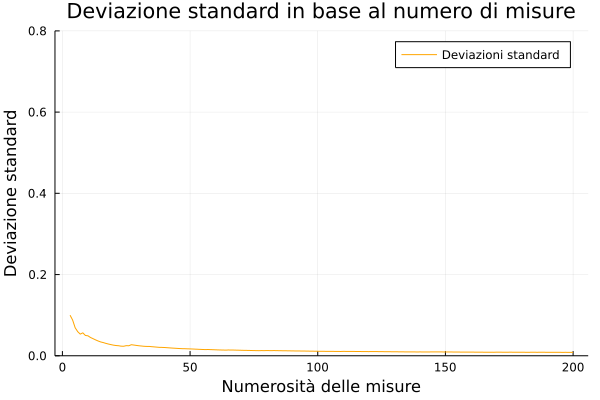

In [17]:
# grafico delle deviazioni con sempre più misure
p5 = plot(3:length(x), deviazioni[3:end], label="Deviazioni standard", xlabel = "Numerosità delle misure", ylabel="Deviazione standard", linecolor=:orange, ylims=(0,0.8), title="Deviazione standard in base al numero di misure")

In [18]:
# salvo il grafico
savefig("deviazioni.png")

In [19]:
media1 = mean(x[1:50])
stddev1 = std(x[1:50])/sqrt(50)
media2 = mean(x[150:200])
stddev2 = std(x[150:200])/sqrt(50)
println("La media dei primi 50 valori è ", media1)
println("La media degli ultimi 50 valori è ", media2)

misura1 = measurement(media1, stddev1) / 4
misura2 = measurement(media2, stddev2) / 4
g1 = 4 * π^2 * L / misura1^2
println("Il valore misurato di g sulle prime 50 misure è ", g1, " m/s^2")
g1 = g1 * (1+theta^2/16)
println("Il valore misurato di g sulle prime 50 misure con correzioni è ", g1, " m/s^2")
g2 = 4 * π^2 * L / misura2^2
println("Il valore misurato di g sulle ultime 50 misure è ", g2, " m/s^2")
g2 = g2 * (1+theta^2/16)
println("Il valore misurato di g sulle ultime 50 misure con correzioni è ", g2, " m/s^2")

La media dei primi 50 valori è 8.425799999999999
La media degli ultimi 50 valori è 8.411176470588234
Il valore misurato di g sulle prime 50 misure è 9.787 ± 0.04 m/s^2
Il valore misurato di g sulle prime 50 misure con correzioni è 9.952 ± 0.041 m/s^2
Il valore misurato di g sulle ultime 50 misure è 9.821 ± 0.043 m/s^2
Il valore misurato di g sulle ultime 50 misure con correzioni è 9.987 ± 0.044 m/s^2


In [20]:
misura = misura / 4
println("Il valore del periodo misurato è ", misura, " s")
g = 4 * π^2 * L / misura^2
println("Il valore misurato di g senza correzioni è ", g, " m/s^2")
g = g * (1+theta^2/16)
println("Il valore misurato di g con correzioni è ", g, " m/s^2")

Il valore del periodo misurato è 2.1063 ± 0.0021 s
Il valore misurato di g senza correzioni è 9.789 ± 0.022 m/s^2
Il valore misurato di g con correzioni è 9.954 ± 0.022 m/s^2


In [21]:
g_vero = 9.80665
k1 = abs(9.789 - g_vero)/g.err
println("L'indice di compatibilità con la misura senza correzioni è ", k1)
k2 = abs(9.954- g_vero)/g.err
print("L'indice di compatibilità con la misura senza correzioni è ", k2)

L'indice di compatibilità con la misura senza correzioni è 0.8054339654699837
L'indice di compatibilità con la misura senza correzioni è 6.724118686232575